In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install pandas_market_calendars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 919.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.3/191.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 5.6 MB/s eta 0:00:00


# Get Org df

In [ ]:
import pandas as pd

dataframes = []

for year in range(2012, 2023):
    print(year)

    # Replace 'your_csv_file.csv' with the actual path to your CSV file.
    wsjarticle_path = '/content/drive/MyDrive/CUNY/Capstone/Data/2_wsj_titles/done/article_content/wsjarticle_%s.csv' % year

    df = pd.read_csv(wsjarticle_path)
    dataframes.append(df)

# Concatenate the DataFrames
org_merged_df = pd.concat(dataframes, ignore_index=True)

# Print the shape of the merged DataFrame to verify
print("Shape of merged DataFrame:", org_merged_df.shape)

# Now, 'merged_df' contains the concatenated data from all CSV files.
print(org_merged_df.head())


2012


<ipython-input-80-3fa837633f80>:11: DtypeWarning: Columns (8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(wsjarticle_path)


2013
2014


<ipython-input-80-3fa837633f80>:11: DtypeWarning: Columns (8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(wsjarticle_path)


2015


<ipython-input-80-3fa837633f80>:11: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(wsjarticle_path)


2016
2017
2018
2019


<ipython-input-80-3fa837633f80>:11: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(wsjarticle_path)


2020
2021
2022
Shape of merged DataFrame: (586243, 16)
    article_id           article_Datatime  \
0  2012_000000  2012-01-01 00:01:00-05:00   
1  2012_000001  2012-01-01 00:01:00-05:00   
2  2012_000002  2012-01-01 00:01:00-05:00   
3  2012_000003  2012-01-01 00:01:00-05:00   
4  2012_000004  2012-01-01 00:01:00-05:00   

                                           title        category  \
0  Job Seekers, Creativity and Flexibility Count     MarketWatch   
1   Conquering a To-Do List That's Too Ambitious  The Aggregator   
2                Indian Snacks That Pack a Punch       Mega Meal   
3             What Is the Payroll Tax Reduction?   Ask Dow Jones   
4            Premier League Enters Twilight Zone          Sports   

                                                href        date         time  \
0  http://online.wsj.com/article/SB10001424052970...  2012-01-01  12:01 AM ET   
1  http://online.wsj.com/article/SB10001424052970...  2012-01-01  12:01 AM ET   
2  https://www.wsj.com

<ipython-input-80-3fa837633f80>:11: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(wsjarticle_path)


In [ ]:
def save_to_sqlite(conn_path, table_name):
    # Establish a connection to the SQLite database
    conn = sqlite3.connect(conn_path)
    # Write the DataFrame to a table in the SQLite database
    df.to_sql(table_name, conn, if_exists='replace', index=False)
    # Close the database connection
    conn.close()

conn_path = '/content/drive/MyDrive/CUNY/Capstone/Data/2_wsj_titles/done/article_content/capstone.db'
table_name = 'WSJ_articles_FinBERT'

save_to_sqlite(conn_path, table_name)

# Delete Unused Columns

In [ ]:
# Copy the original DataFrame
df = org_merged_df.copy()
# Apply the first set of conditions to filter the DataFrame
condition1 = df['check'] != 'N'
condition2 = df['paragraphs'] != ''
df = df[condition1 & condition2]

# Delete unuseful rows
categories_to_remove = ["Crossword", "Crossword Contest", "Variety Puzzle",
                        "Number Puzzles", "Pepper & Salt", "Food", "Sport",
                        "Recipes", "Libations", "tennis", "fitness", "Wine"]
df = df[~df['category'].isin(categories_to_remove)]


## Remove Short Paragraphs

In [ ]:
import pandas as pd


# Function to check if a string contains less than a specified number of words
def has_few_words(text, min_words=3):
    if isinstance(text, str):  # Check if it's a string
        words = text.split()
        return len(words) < min_words
    else:
        return True  # Consider non-string values as having fewer than min_words

# Apply the condition to the 'paragraphs' column
df['paragraphs'] = df['paragraphs'].apply(lambda x: x if not has_few_words(x) else '')

# # Drop rows where 'paragraphs' is 'N/A'
# df = df[df['paragraphs'] != 'N/A']

print(df)


         article_id           article_Datatime  \
0       2012_000000  2012-01-01 00:01:00-05:00   
1       2012_000001  2012-01-01 00:01:00-05:00   
2       2012_000002  2012-01-01 00:01:00-05:00   
3       2012_000003  2012-01-01 00:01:00-05:00   
4       2012_000004  2012-01-01 00:01:00-05:00   
...             ...                        ...   
586238  2022_032908  2022-12-31 19:15:00-05:00   
586239  2022_032909  2022-12-31 20:29:00-05:00   
586240  2022_032910  2022-12-31 21:39:00-05:00   
586241  2022_032911  2022-12-31 22:04:00-05:00   
586242  2022_032912  2022-12-31 22:19:00-05:00   

                                                    title        category  \
0           Job Seekers, Creativity and Flexibility Count     MarketWatch   
1            Conquering a To-Do List That's Too Ambitious  The Aggregator   
2                         Indian Snacks That Pack a Punch       Mega Meal   
3                      What Is the Payroll Tax Reduction?   Ask Dow Jones   
4             

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
summary = df.describe(include='all')
# 1. Check for Null Values in All Columns
null_values = df.isnull().sum()

# Print the summary statistics
print(summary)
print("null_values: ", null_values)


In [ ]:
from dateutil import parser
import pytz


df['article_id'] = df['article_id'].astype(str)


# Define Eastern Time (ET) timezone
et_timezone = pytz.timezone('US/Eastern')

# Convert "article_Datatime" to datetime with UTC timezone
df['article_Datatime'] = df['article_Datatime'].astype(str)
df['article_Datatime'] = pd.to_datetime(df['article_Datatime'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

# Ensure that "trade_datetime" is recognized as datetime-like
df['trade_datetime'] = pd.to_datetime(df['article_Datatime'], utc=True)
# Convert to Eastern Time (ET)
df['trade_datetime_et'] = df['trade_datetime'].dt.tz_convert(et_timezone)
# Convert "trade_datetime_et" to normal time (without timezone)
df['trade_datetime_local'] = df['trade_datetime_et'].dt.tz_localize(None)

# Convert the "date" column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Parse the "time" column using dateutil.parser
df['time'] = df['time'].apply(lambda x: parser.parse(x))
# If you want to extract the time component as a string (without timezone)
# Convert the "time" column to datetime with 24-hour format
df['time'] = pd.to_datetime(df['time'], format='%I:%M %p').dt.strftime('%H:%M')

# Change the data type of the "time" column to datetime
df['time'] = pd.to_datetime(df['time'], format='%H:%M')

# Fill NaN values in "comment_count" and convert to integer
df['comment_count'].fillna(0, inplace=True)
df['comment_count'] = df['comment_count'].astype(int)

# Print the data types of the columns
print(df.dtypes)


In [ ]:
import pandas as pd


# Function to determine which column has more categories
def merge_categories(row):
    category_count = 0 if pd.isna(row['category']) else len(row['category'].split(','))
    tags_count = 0 if pd.isna(row['tags']) else len(row['tags'].split(','))

    if tags_count > category_count:
        return row['tags']
    else:
        return row['category']

# Apply the function to merge the columns
df['category_tags'] = df.apply(merge_categories, axis=1)

# Drop the original "category" and "tags" columns
# df.drop(['category', 'tags'], axis=1, inplace=True)

print(df)


In [ ]:
print(type(df))
print(df)

In [ ]:
print(df['article_Datatime'][:5])
print(df['trade_datetime'][:5])
print(df['trade_datetime_et'][:5])
print(df['trade_datetime_local'][:5])

In [ ]:
print(df['article_Datatime'][10000:10005])
print(df['trade_datetime'][10000:10005])
print(df['trade_datetime_et'][10000:10005])
print(df['trade_datetime_local'][10000:10005])

# Time Processing
Includes time zone and data type.

In [ ]:
import pandas as pd
import pytz
from pandas_market_calendars import get_calendar



# Define the CME_equity closing time
exchange_closing_time = pd.Timestamp("17:00:00").time()

# Get the CME_equity calendar
exchange_calendar = get_calendar("CME_Equity")

# Create a function to classify the business day
def classify_business_day(row):


    if row['trade_datetime_local'].time() <= exchange_closing_time and row['trade_datetime_local'].date().strftime('%Y-%m-%d') in exchange_calendar.valid_days(start_date=row['trade_datetime_local'].date(), end_date=row['trade_datetime_local'].date()).strftime('%Y-%m-%d'):

        return row['trade_datetime_local'].date()

    else:
        # Initialize a variable to track the next day
        next_day = row['trade_datetime_local'] + pd.DateOffset(days=1)
        while True:
            # Check if the next day is a business day (not a weekend or holiday)
            next_day_date = next_day.date()
            valid_days = exchange_calendar.valid_days(start_date=next_day_date, end_date=next_day_date)
            if len(valid_days) > 0:
                # Ensure the date is in the ET timezone
                return et_timezone.localize(pd.Timestamp(next_day_date)).date()
            else:
                # Move to the next day
                next_day += pd.DateOffset(days=1)

# Define Eastern Time (ET) timezone
et_timezone = pytz.timezone('US/Eastern')

# Apply the function to create a new 'Business Day' column
df['Business_Day'] = pd.to_datetime(df.apply(classify_business_day, axis=1))


# Print the resulting DataFrame
print(df)


In [ ]:
print(df.columns)


In [ ]:
# List of columns to keep
# columns_to_keep = ["article_id", "trade_datetime_local", "Business_Day", "check", "category", "tags", "category_tags", "author", "title", "abstract", "image_captions", "paragraphs", "href"]
columns_to_keep = ["article_id", "trade_datetime_local", "Business_Day", "category_tags", "title", "paragraphs"]

# Create a new DataFrame with only the selected columns
new_df = df[columns_to_keep]


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
summary = new_df.describe(include='all')

# Print the summary statistics
print(summary)


In [ ]:
# # Create a boolean mask for rows containing "Download PDF."
# mask = new_df['paragraphs'].str.contains("Download PDF.", case=False, na=False)

# # Use the mask to filter the DataFrame
# download_pdf_rows = new_df[mask]

# # Print the rows that contain "Download PDF."
# print(download_pdf_rows[190:200])


# Market Price

In [ ]:
import pandas as pd
import sqlite3

m_p_path = "/content/drive/MyDrive/CUNY/Capstone/Data/market_price/S&P500_Futures_Historical_Data_20110101-20231006.csv"
org_m_p_df = pd.read_csv(m_p_path)

def save_to_sqlite(df, conn_path, table_name):
    # Use a context manager to handle the connection
    with sqlite3.connect(conn_path) as conn:
        df.to_sql(table_name, conn, if_exists='replace', index=False)


conn_path = '/content/drive/MyDrive/CUNY/Capstone/Data/2_wsj_titles/done/article_content/capstone.db'
table_name = 'e_mini_sp500_futuresHistorical_data_20110101_20231006'

save_to_sqlite(org_m_p_df, conn_path, table_name)


In [ ]:
import sqlite3

conn_path = '/content/drive/MyDrive/CUNY/Capstone/Data/2_wsj_titles/done/article_content/capstone.db'
# Connect to the SQLite database
conn = sqlite3.connect(conn_path)  # Replace 'your_database.db' with your database file

# Create a cursor object
cursor = conn.cursor()

# Query the table names from sqlite_master
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all the table names
tables = cursor.fetchall()

# Close the cursor and the database connection
cursor.close()
conn.close()

# Extract and print the table names
table_names = [table[0] for table in tables]
print("Tables in the database:", table_names)


Tables in the database: ['WSJ_articles_org', 'WSJ_articles_ESP500_2012_2022', 'WSJ_articles_FinBERT', 'WSJ_articles_FinBERT_back', 'e_mini_sp500_futuresHistorical_data_20110101_20231006']


In [ ]:
m_p_path = "/content/drive/MyDrive/CUNY/Capstone/Data/market_price/S&P500_Futures_Historical_Data_20110101-20231006.csv"
org_m_p_df = pd.read_csv(m_p_path)
org_m_p_df['Date'] = pd.to_datetime(org_m_p_df['Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')


# Display the data types of all columns
print(org_m_p_df)
print(len(org_m_p_df))


In [ ]:
import pandas as pd

# Assuming you have already loaded your data into org_m_p_df
m_p_df = org_m_p_df.copy()

# Fill missing "Vol." values with 0
m_p_df['Vol.'] = m_p_df['Vol.'].fillna("0")

# Convert the "date" column to datetime
m_p_df['Date'] = pd.to_datetime(m_p_df['Date'], format='%Y-%m-%d')

# Sort the DataFrame by 'Date'
m_p_df = m_p_df.sort_values(by='Date')

# Remove commas and convert string columns to float
m_p_df['Price'] = m_p_df['Price'].str.replace(',', '').astype(float)
m_p_df['Open'] = m_p_df['Open'].str.replace(',', '').astype(float)
m_p_df['High'] = m_p_df['High'].str.replace(',', '').astype(float)
m_p_df['Low'] = m_p_df['Low'].str.replace(',', '').astype(float)

# Convert the 'Vol.' column to numeric, handling 'K' and 'M' suffixes
def convert_vol(value):
    if value.endswith('K'):
        return float(value.replace('K', '')) * 1e3
    elif value.endswith('M'):
        return float(value.replace('M', '')) * 1e6
    else:
        return float(value)

m_p_df['Vol.'] = m_p_df['Vol.'].apply(convert_vol)

# Calculate the "Change %" column based on the formula
m_p_df['Change %'] = (m_p_df['Price'] / m_p_df['Price'].shift(1) - 1) * 100

# Drop the first row since it doesn't have a previous business day

# Reset the index
m_p_df = m_p_df.reset_index(drop=True)


null_rows = m_p_df[m_p_df['Date'].isnull()]

# Extract the "article_id" from the selected rows
null_ids = null_rows['Vol.']

# Display the data types of all columns
print(m_p_df)
print(len(m_p_df))
print(m_p_df.describe())
print(m_p_df.dtypes)
print("null_ids: ", null_ids)





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with a 'Change %' column

# Filter positive and negative values
positive_changes = m_p_df[m_p_df['Change %'] >= 0]['Change %']
negative_changes = m_p_df[m_p_df['Change %'] < 0]['Change %']

# Calculate the average for each set of values
average_positive = positive_changes.mean()
average_negative = negative_changes.mean()

# Count the occurrences
count_positive = positive_changes.count()
count_negative = negative_changes.count()

# Create box plots
plt.figure(figsize=(10, 6))
plt.boxplot([positive_changes, negative_changes], labels=['Positive', 'Negative'])
plt.title('Box Plot of Positive and Negative Changes')
plt.ylabel('Change %')
plt.show()

# Print the results
print("Average of Positive Changes:", average_positive)
print("Number of Occurrences of Positive Changes:", count_positive)
print("Average of Negative Changes:", average_negative)
print("Number of Occurrences of Negative Changes:", count_negative)


In [ ]:
import pandas as pd

# Assuming you have two DataFrames: df_original and df_sp500
# df_original should have a "Date" column, and df_sp500 should have a "Date" column as well.

# Merge the two DataFrames based on the "Date" column
merged_df = new_df.merge(m_p_df, left_on="Business_Day", right_on="Date", how="left")

merged_df['title'] = merged_df['title'].astype(str)
merged_df['paragraphs'] = merged_df['paragraphs'].astype(str)


In [ ]:
print(merged_df.head())

# Assign New Value

## price_change to Binary Classification

In [ ]:
merged_df['price_change'] = merged_df['Change %'].apply(lambda x: "1" if x >= 0 else "0")


## Fill in Missing Text Fields

In [ ]:
# import pandas as pd


# # Function to fill in blank parts according to your logic
# def fill_blank_parts(row):

#     if  row['paragraphs'] == "" or row['paragraphs'] == 'nan':
#         row['paragraphs'] = row['title']

#     if  row['abstract'] == "" or row['image_captions'] == 'nan':
#         row['abstract'] = row['paragraphs'] if row['paragraphs'] else row['title']

#     if  row['image_captions'] == "" or row['image_captions'] == "nan" :
#         row['image_captions'] = row['paragraphs'] if row['paragraphs'] else (row['abstract'] if row['abstract'] else row['title'])

#     return row



# merged_df['title'] = merged_df['title'].astype(str)
# merged_df['abstract'] = merged_df['abstract'].astype(str)
# merged_df['image_captions'] = merged_df['image_captions'].astype(str)
# merged_df['paragraphs'] = merged_df['paragraphs'].astype(str)


# # Apply the function to fill in blank parts
# merged_df = merged_df.apply(fill_blank_parts, axis=1)

# # Verify the updated DataFrame
# print(merged_df)
# print(merged_df.dtypes)


In [ ]:
# nan_rows = merged_df[(merged_df['image_captions'] == 'nan') | (merged_df['image_captions'] == '')]
# print(nan_rows)


## Check category_tags

In [ ]:
unique_categories = df['category'].unique()
print(unique_categories)

['MarketWatch' 'The Aggregator' 'Mega Meal' ... 'science of success'
 'TABLE TALK' 'Personal Board of directors']


# Save Final Data

## Check for Missing Values

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
summary = merged_df.describe(include='all')
# 1. Check for Null Values in All Columns
null_values = merged_df.isnull().sum()

# Print the summary statistics
print(summary)
print("null_values: ", null_values)


<ipython-input-103-15a737b2c463>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary = merged_df.describe(include='all')
<ipython-input-103-15a737b2c463>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary = merged_df.describe(include='all')
<ipython-input-103-15a737b2c463>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary = merged_df.describe(include='all')


         article_id trade_datetime_local         Business_Day category_tags  \
count        545322               545322               545322        544432   
unique       545322               468149                 2837          3266   
top     2012_000000  2012-01-27 00:01:00  2013-04-01 00:00:00      Business   
freq              1                  151                  518         43092   
first           NaN  2012-01-01 00:01:00  2012-01-03 00:00:00           NaN   
last            NaN  2022-12-31 22:19:00  2023-01-03 00:00:00           NaN   
mean            NaN                  NaN                  NaN           NaN   
std             NaN                  NaN                  NaN           NaN   
min             NaN                  NaN                  NaN           NaN   
25%             NaN                  NaN                  NaN           NaN   
50%             NaN                  NaN                  NaN           NaN   
75%             NaN                  NaN            

In [ ]:
# Select rows with null values in specific columns
null_rows = merged_df[merged_df['Date'].isnull()]

# Extract the "article_id" from the selected rows
null_ids = null_rows['article_id']

# Print the "article_id" values
print(null_ids)


2136     2012_002207
2137     2012_002208
2138     2012_002209
2139     2012_002210
2140     2012_002211
            ...     
71735    2013_008732
71736    2013_008733
71737    2013_008734
71738    2013_008735
71739    2013_008736
Name: article_id, Length: 1731, dtype: object


## Check for Duplicate Values

In [ ]:
import pandas as pd
# Identify duplicates in "Column1" and keep the first occurrence
merged_df = merged_df[~merged_df.duplicated(subset='article_id', keep='first')]

print(merged_df.describe(include='all'))

<ipython-input-105-517b27b79b7b>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(merged_df.describe(include='all'))
<ipython-input-105-517b27b79b7b>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(merged_df.describe(include='all'))
<ipython-input-105-517b27b79b7b>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(merged_df.describe(include='all'))


         article_id trade_datetime_local         Business_Day category_tags  \
count        545322               545322               545322        544432   
unique       545322               468149                 2837          3266   
top     2012_000000  2012-01-27 00:01:00  2013-04-01 00:00:00      Business   
freq              1                  151                  518         43092   
first           NaN  2012-01-01 00:01:00  2012-01-03 00:00:00           NaN   
last            NaN  2022-12-31 22:19:00  2023-01-03 00:00:00           NaN   
mean            NaN                  NaN                  NaN           NaN   
std             NaN                  NaN                  NaN           NaN   
min             NaN                  NaN                  NaN           NaN   
25%             NaN                  NaN                  NaN           NaN   
50%             NaN                  NaN                  NaN           NaN   
75%             NaN                  NaN            

## WordCloud

         article_id trade_datetime_local Business_Day       category_tags  \
1904    2012_001969  2012-01-12 17:02:00   2012-01-13             Markets   
1905    2012_001970  2012-01-12 17:11:00   2012-01-13            Business   
1906    2012_001971  2012-01-12 17:15:00   2012-01-13             Markets   
1907    2012_001972  2012-01-12 17:24:00   2012-01-13            Business   
1908    2012_001973  2012-01-12 17:52:00   2012-01-13            New York   
...             ...                  ...          ...                 ...   
545317  2022_032908  2022-12-31 19:15:00   2023-01-03                U.S.   
545318  2022_032909  2022-12-31 20:29:00   2023-01-03  World, Asia, China   
545319  2022_032910  2022-12-31 21:39:00   2023-01-03  World, Asia, China   
545320  2022_032911  2022-12-31 22:04:00   2023-01-03            Business   
545321  2022_032912  2022-12-31 22:19:00   2023-01-03         World, Asia   

                                                    title  \
1904          

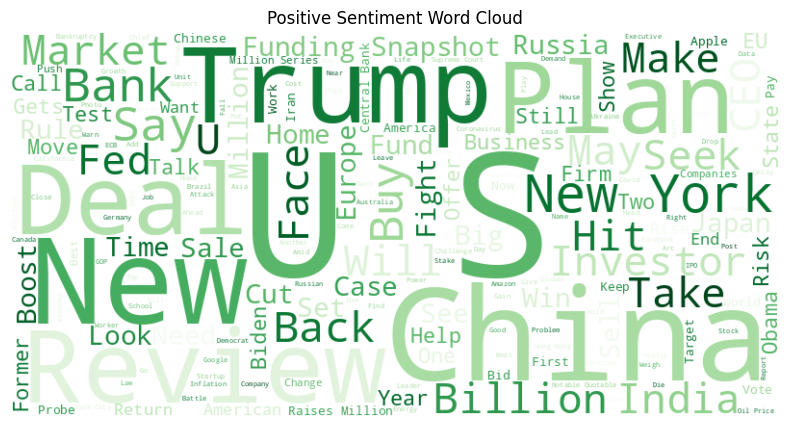

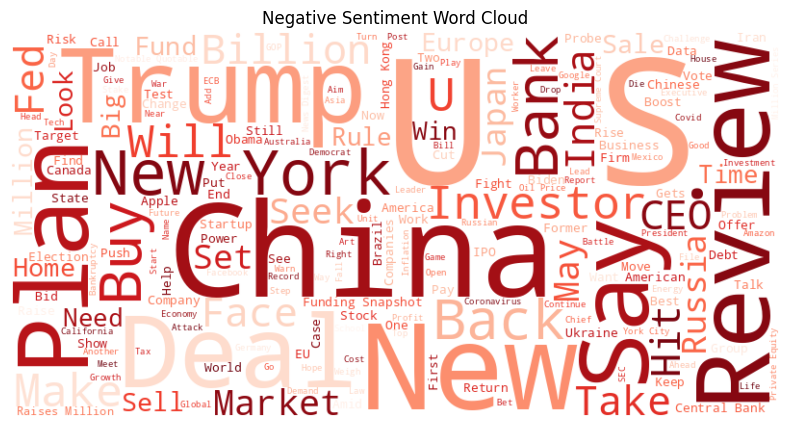

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named merged_df with columns 'title' and 'price_change'

# Split the DataFrame into positive and negative sentiment DataFrames
positive_df = merged_df[merged_df['price_change'] == "1"]
negative_df = merged_df[merged_df['price_change'] == "0"]
print(negative_df)
# Create a WordCloud for positive sentiment words
# positive_text = ' '.join(positive_df['title']).join(positive_df['abstract']).join(positive_df['image_captions']).join(positive_df['paragraphs'])
positive_text = ' '.join(positive_df['title'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)

# Create a WordCloud for negative sentiment words
# negative_text = ' '.join(negative_df['title']).join(negative_df['abstract']).join(negative_df['image_captions']).join(negative_df['paragraphs'])
negative_text = ' '.join(negative_df['title'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Plot the positive sentiment word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")

# Show the positive sentiment word cloud
plt.show()

# Plot the negative sentiment word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Word Cloud")

# Show the negative sentiment word cloud
plt.show()


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
merged_df.to_csv('/content/drive/MyDrive/CUNY/Capstone/Data/2_wsj_titles/test_m.csv', index=False)


In [ ]:
import sqlite3
import pandas as pd

# Open a connection to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/CUNY/Capstone/Data/2_wsj_titles/capstone.db')

# Write the DataFrame to a table in the SQLite database
merged_df.to_sql('WSJ_articles_ESP500', conn, if_exists='replace', index=False)

# Close the database connection
conn.close()


In [2]:
! pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b